In [9]:
import numpy as np 
import pandas as pd
from  matplotlib import pyplot as plt
import math 
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure



In [10]:
bc_df = pd.read_csv("./Data/Breast_cancer_data.csv")

X = bc_df[["mean_radius", "mean_texture",
             "mean_perimeter",
             "mean_area",
             "mean_smoothness"
            ]]
y = bc_df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123456789)

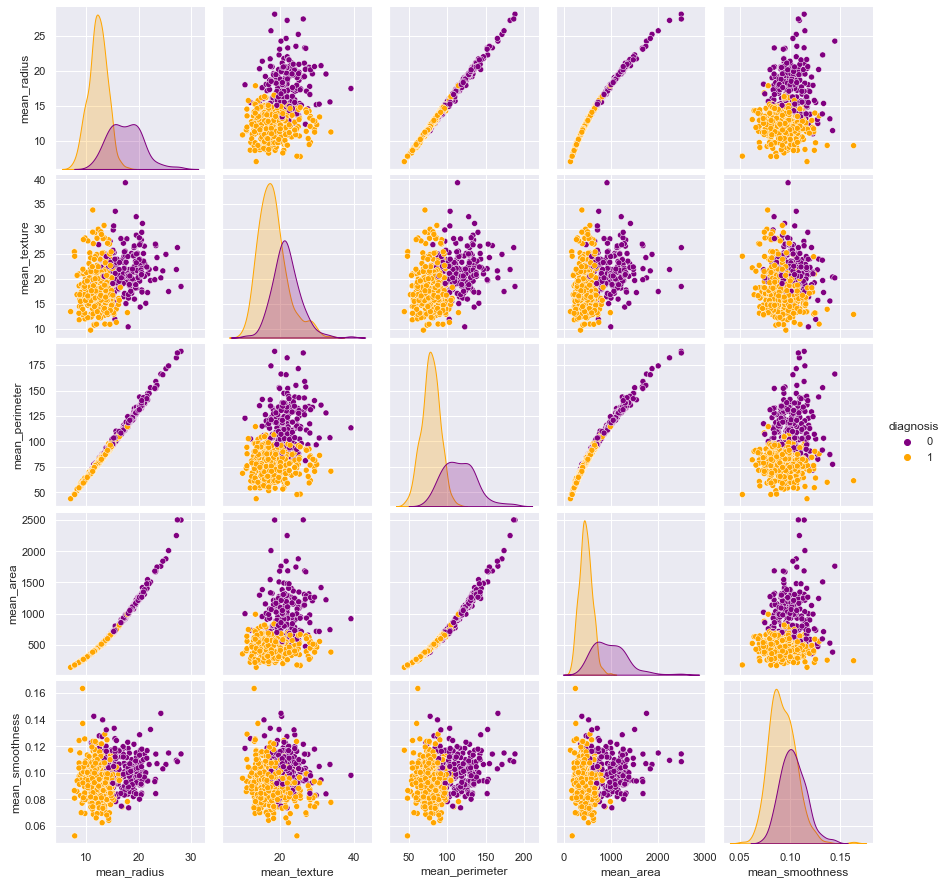

In [11]:
palette = {1: 'orange', 
    0 : 'purple',
    }

g = sns.pairplot(bc_df, vars = bc_df.columns[0:5],
                 hue="diagnosis", palette=palette)

## Naive Bayes

In [12]:


class NaiveBayes:
    def __init__(self):

        self.features = list
        self.likelihoods = {}
        self.priors = {}
        self.X_train = np.array
        self.y_train = np.array
        self.class_list = list
        self.train_size = int 
        self.num_features  = int
        self.confusion_matrix = np.array

    def _calc_priors(self):

        self.class_list = np.unique(self.y_train)
        for _class in  self.class_list:
            self.priors[_class] = sum(self.y_train == _class)/self.train_size


    def _calc_likelihood(self):
        
        for feature in self.features:
            for _class in self.class_list:
                self.likelihoods[feature][_class]["mean"] = self.X_train[feature][self.y_train[self.y_train == _class].index.values.tolist()].mean()
                self.likelihoods[feature][_class]["variance"] = self.X_train[feature][self.y_train[self.y_train == _class].index.values.tolist()].var()


    def run_model(self , X, y): 
        
        self.X_train = X
        self.y_train = y
        self.features = list(X.columns)
        self.train_size = X.shape[0]
        self.num_features = X.shape[1]
        self.class_list = list(np.unique(y))
        self.confusion_matrix = np.zeros((len(self.class_list), len(self.class_list)))

        for feature in self.features: 

            self.likelihoods[feature] = {}

            for _class in self.class_list:
                self.likelihoods[feature].update({_class:{}})
                self.priors.update({_class:0})


        self._calc_priors()
        self._calc_likelihood()

    def  predict(self, X):
        
        X = np.array(X)
        results = []
        for row in X:
            prob_of_classes = {}

            for _class in  self.class_list:
                prior = self.priors[_class]
                evidence = 1
                likelihood = 1 
                
                for feature, feature_value in zip(self.features, row):
        
                    mean = self.likelihoods[feature][_class]["mean"]
                    var = self.likelihoods[feature][_class]["variance"]
                    likelihood *= (1/math.sqrt(2*math.pi*var)) * np.exp(-(feature_value - mean)**2 / (2*var))
                posterior_numerator = (likelihood * prior)/evidence
                prob_of_classes[_class] = posterior_numerator

            max_probability = max(prob_of_classes, key = lambda x : prob_of_classes[x])
            results.append(max_probability)

        return np.array(results)


    def make_confusing_matrix(self, y_true, y_pred):
        for i in range(len(self.class_list)):
            for j in range(len(self.class_list)):
                self.confusion_matrix[i,j] = np.sum((y_true == self.class_list[i])
                                                    &(y_pred == self.class_list[j]) )

        return self.confusion_matrix.astype(np.int32)

def calc_accuracy(y_true, y_pred):
	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)
    

def calc_precision_recall(confusion_matrix):
    tp = confusion_matrix[0,0]
    fn = confusion_matrix[0,1]
    fp = confusion_matrix[1,0]
    tn = confusion_matrix[1,1]

    precision = round(float(tp/(tp+fp))*100, 2)
    recall = round(float(tp/(tp+fn))*100,2)

    return precision, recall

      

In [13]:
naive_bayes = NaiveBayes()
naive_bayes.run_model(X_train, y_train)

y_pred = naive_bayes.predict(X_test)
test_accuracy = calc_accuracy(y_test, y_pred)
print("Test Accuracy: {}".format(test_accuracy))

Test Accuracy: 88.6


Text(59.400000000000006, 0.5, 'predicted label')

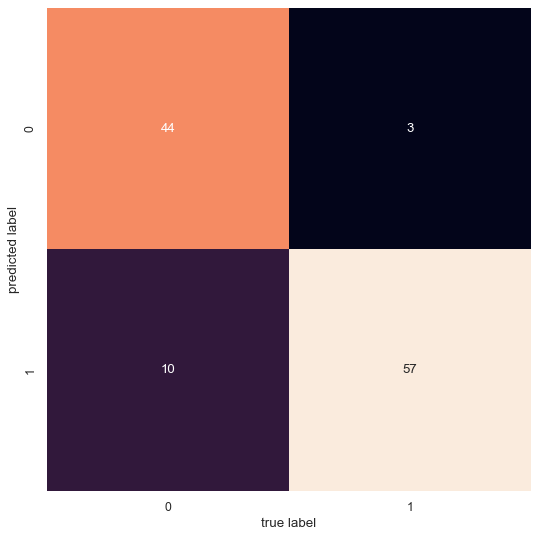

In [14]:
figure(figsize=(8, 8), dpi=80)
conf_mat = naive_bayes.make_confusing_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T,  square=True, 
        annot= True ,  fmt ="d", cbar= False,
          )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [15]:
precision, recall = calc_precision_recall(conf_mat)
print("precision : ", precision,"\n", "recall : ", recall)

precision :  93.62 
 recall :  81.48


## Naive bayes model with libraries

In [16]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score 
from sklearn .metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
clf = GaussianNB()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The accuracy of the naive with library model is: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the naive with library model is: 89.47%


Text(59.400000000000006, 0.5, 'predicted label')

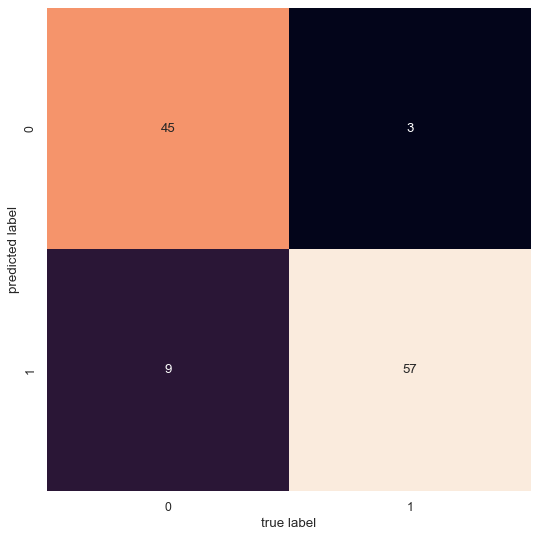

In [18]:
figure(figsize=(8, 8), dpi=80)
confusion_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mtx.T,  square=True, 
        annot= True ,  fmt ="d", cbar= False,
          )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [19]:
precision, recall = calc_precision_recall(confusion_mtx)
print("precision : ", precision,"\n", "recall : ", recall)

precision :  93.75 
 recall :  83.33


## Optimal Bayes 

In [20]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessClassifier

gp = GaussianProcessClassifier()
gp.fit(X_train, y_train)
y_pred = gp.predict(X_test)   
calc_accuracy(y_test, y_pred)                                  

85.09

Text(59.400000000000006, 0.5, 'predicted label')

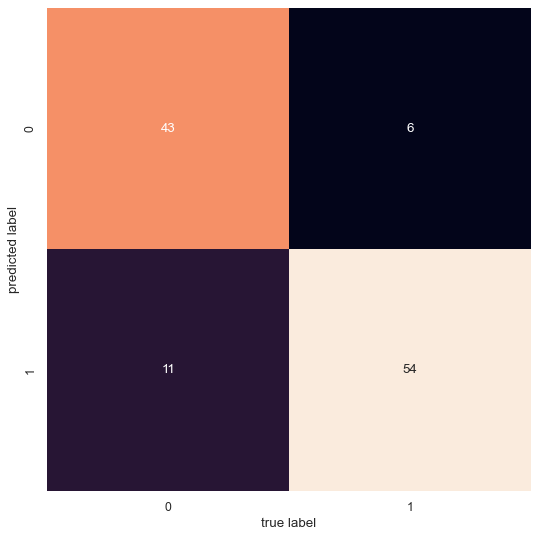

In [21]:
figure(figsize=(8, 8), dpi=80)
conf_mat = naive_bayes.make_confusing_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T,  square=True, 
        annot= True ,  fmt ="d", cbar= False,
          )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [22]:
precision, recall = calc_precision_recall(conf_mat)
print("precision : ", precision,"\n", "recall : ", recall)

precision :  87.76 
 recall :  79.63
